In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("employee_attrition.csv")
df.head()

,age,years_at_company,job_level,salary,num_projects,left_company
0,30,19,2,140198,7,0
1,50,18,4,32356,8,1
2,35,34,2,100326,2,1
3,43,16,5,122447,5,0
4,32,33,5,144994,1,1


In [4]:
features = ['age', 'years_at_company', 'job_level', 'salary', 'num_projects']
target = 'left_company'
X = df[features]
y = df[target]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)


In [7]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [8]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]


In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [10]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.5167
Precision: 0.5185
Recall: 0.9032
F1-Score: 0.6588
ROC-AUC Score: 0.3949


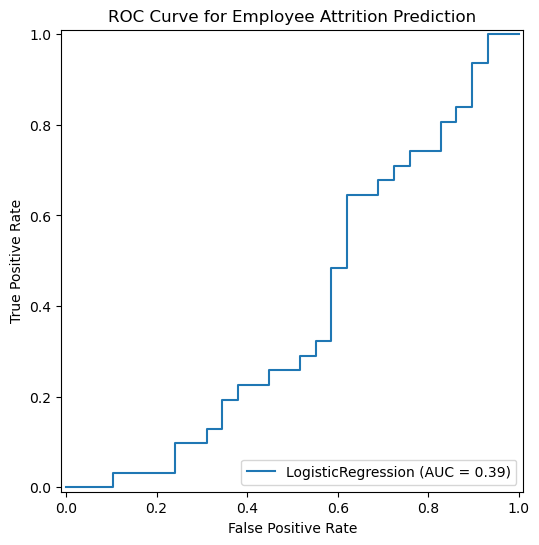

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, ax=ax)
plt.title('ROC Curve for Employee Attrition Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_curve.png')

In [13]:
coefficients = model.coef_[0]
feature_importances = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
}).sort_values(by='Absolute Coefficient', ascending=False)

print("\nRecommend which factors HR should monitor to reduce attrition.")
print(feature_importances)


Recommend which factors HR should monitor to reduce attrition.
            Feature  Coefficient  Absolute Coefficient
4      num_projects    -0.330196              0.330196
3            salary    -0.145831              0.145831
1  years_at_company    -0.139122              0.139122
0               age    -0.106105              0.106105
2         job_level     0.048732              0.048732
